In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("data/uscities.csv").drop(columns=['city_ascii', 'state_name', 'county_name', 'source', 'military', 
                                               'incorporated', 'timezone', 'zips', 'county_fips'])
df_cluster = df.drop(columns=['city', 'state_id', 'id', 'lat', 'lng', 'population', 'ranking'])
print("features: ", df_cluster.columns)

kmeans = KMeans(n_clusters=9)
     
#predict the labels of clusters.
label = kmeans.fit_predict(df_cluster)

print("clustering on ", len(df), " cities done")

features:  Index(['density'], dtype='object')
clustering on  28338  cities done


In [20]:
df['cluster'] = label


seattle_cluster = None
portland_cluster = None
sf_cluster = None
philadelphia_cluster = None
bos_cluster = None

for i, city in df.iterrows():
    if city['city'] == 'Seattle' and city['state_id'] == 'WA':
        seattle_cluster = city['cluster']
    if city['city'] == 'Portland' and city['state_id'] == 'OR':
        portland_cluster = city['cluster']
    if city['city'] == 'San Francisco' and city['state_id'] == 'CA':
        sf_cluster = city['cluster']
    if city['city'] == 'Philadelphia' and city['state_id'] == 'PA':
        philadelphia_cluster = city['cluster']
    if city['city'] == 'Boston' and city['state_id'] == 'MA':
        bos_cluster = city['cluster']

print("Boston cluster group       :", bos_cluster)
print("Philadelphia cluster group :", philadelphia_cluster)
print("Seattle cluster group      :", seattle_cluster)
print("Portland cluster group     :", portland_cluster)
print("San Francisco cluster group:", sf_cluster)

print("\ncities similar to Boston:")
df.loc[df['cluster'] == bos_cluster]

Boston cluster group       : 2
Philadelphia cluster group : 2
Seattle cluster group      : 2
Portland cluster group     : 1
San Francisco cluster group: 7

cities similar to Boston:


,city,state_id,lat,lng,population,density,ranking,id,cluster
2,Chicago,IL,41.8373,-87.6862,8604203,4574,1,1840000494,2
3,Miami,FL,25.7839,-80.2102,6445545,5019,1,1840015149,2
5,Philadelphia,PA,40.0077,-75.1339,5649300,4554,1,1840000673,2
8,Washington,DC,38.9047,-77.0163,5379184,4457,1,1840006060,2
9,Boston,MA,42.3188,-71.0846,4688346,5532,1,1840000455,2
...,...,...,...,...,...,...,...,...,...
23076,Miguel Barrera,TX,26.4120,-98.9216,229,5119,2,1840041163,2
23099,Barrera,TX,26.3925,-98.8985,228,3522,2,1840040642,2
23485,Mobile City,TX,32.9228,-96.4111,210,5377,2,1840020719,2
24304,Pena,TX,26.4155,-98.9700,175,4518,2,1840041420,2


(13338,)


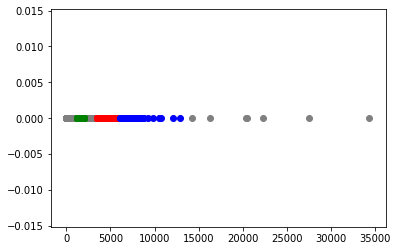

In [27]:
import matplotlib.pyplot as plt
import numpy as np

df_cluster
#filter rows of original data
filtered_label0 = df_cluster[label == 0]
filtered_label1 = df_cluster[label == 1]
filtered_label2 = df_cluster[label == 2]
filtered_label3 = df_cluster[label == 3]
filtered_label4 = df_cluster[label == 4]
filtered_label5 = df_cluster[label == 5]
filtered_label6 = df_cluster[label == 6]
filtered_label7 = df_cluster[label == 7]
filtered_label8 = df_cluster[label == 8]

filtered_label_list = [filtered_label0, filtered_label1, filtered_label2, 
                       filtered_label3, filtered_label4, filtered_label5,
                       filtered_label6, filtered_label7, filtered_label8]

zeros = np.zeros(13338)
print(zeros.shape)

filtered_label_bos = filtered_label_list[bos_cluster]
filtered_label_portland = filtered_label_list[portland_cluster]
filtered_label_sf = filtered_label_list[sf_cluster]

filtered_label_list = [v for i,v in enumerate(filtered_label_list) if i not in frozenset((bos_cluster,portland_cluster,sf_cluster))] 

for filtered_label in filtered_label_list:
    plt.scatter(filtered_label['density'], np.zeros(len(filtered_label)), color = 'gray')
    
plt.scatter(filtered_label_bos['density'], np.zeros(len(filtered_label_bos)), color = 'red')
plt.scatter(filtered_label_portland['density'], np.zeros(len(filtered_label_portland)), color = 'green')
plt.scatter(filtered_label_sf['density'], np.zeros(len(filtered_label_sf)), color = 'blue')
plt.show()